In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Norm, Stan, Robust, log

D:\Softwares\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_wo_lag.csv',header = 0)
features = ['Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_current'])
y = df["Chl_current"]

In [4]:
x.head()

,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


In [5]:
features = list(x.columns)
features

['Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [5]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler()
# transform data
x_norm = norm.fit_transform(x)

In [6]:
x_norm = pd.DataFrame(x_norm, columns = features)

In [7]:
x_norm.describe()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000
mean,0.074862,0.235703,0.026262,0.290602,0.624921,0.650213,0.025829,0.031986,0.667563,0.601151,0.349778,0.261524,0.531637,0.699141
std,0.105363,0.130509,0.065576,0.068058,0.083805,0.179410,0.037839,0.069737,0.221799,0.217944,0.154471,0.207426,0.256537,0.329068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014085,0.161751,0.005076,0.254724,0.581427,0.518175,0.009063,0.011834,0.489877,0.423938,0.237768,0.090729,0.295139,0.630299
50%,0.038579,0.223844,0.005076,0.295078,0.630888,0.664932,0.016608,0.023361,0.689805,0.623056,0.334226,0.207020,0.564067,0.698453
75%,0.090631,0.285936,0.015976,0.331693,0.676985,0.801801,0.028061,0.035503,0.882140,0.805098,0.454000,0.397682,0.762688,0.992336
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler
stan = StandardScaler()
# transform data
x_stan = stan.fit_transform(x)

In [9]:
x_stan = pd.DataFrame(x_stan, columns = features)

In [10]:
x_stan.describe()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03
mean,1.856604e-15,2.914657e-16,3.580598e-16,3.809967e-17,5.075287e-15,-2.582811e-17,-1.836317e-17,-3.082347e-17,-4.998574e-17,-5.859510e-17,-7.452886e-18,-1.728620e-16,-9.926473e-17,9.091236e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-7.106181e-01,-1.806287e+00,-4.005358e-01,-4.270529e+00,-7.457911e+00,-3.624701e+00,-6.826967e-01,-4.587399e-01,-3.010198e+00,-2.758680e+00,-2.264686e+00,-1.260990e+00,-2.072657e+00,-2.124919e+00
25%,-5.769221e-01,-5.667263e-01,-3.231165e-01,-5.272379e-01,-5.190680e-01,-7.360662e-01,-4.431352e-01,-2.890148e-01,-8.012274e-01,-8.132296e-01,-7.252240e-01,-8.235230e-01,-9.220188e-01,-2.092313e-01
50%,-3.444074e-01,-9.088734e-02,-3.231165e-01,6.577268e-02,7.121553e-02,8.205287e-02,-2.437169e-01,-1.237075e-01,1.002934e-01,1.005220e-01,-1.006905e-01,-2.628031e-01,1.264308e-01,-2.088320e-03
75%,1.496864e-01,3.849516e-01,-1.568726e-01,6.038504e-01,6.213437e-01,8.450505e-01,5.898925e-02,5.043530e-02,9.675792e-01,9.359095e-01,6.748029e-01,6.565130e-01,9.007828e-01,8.911173e-01
max,8.781795e+00,5.857100e+00,1.485106e+01,1.042493e+01,4.476257e+00,1.949935e+00,2.574892e+01,1.388303e+01,1.499036e+00,1.830315e+00,4.209961e+00,3.560707e+00,1.825975e+00,9.144109e-01


In [11]:
from sklearn.preprocessing import RobustScaler
robu = RobustScaler()
# transform data
x_robu = robu.fit_transform(x)

In [12]:
x_robu = pd.DataFrame(x_robu, columns = features)

In [13]:
x_robu.describe()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3456.000000,3456.000000,3456.000000,3456.000000,3.456000e+03,3.456000e+03,3456.000000,3.456000e+03,3456.000000,3.456000e+03,3456.000000,3456.000000,3.456000e+03,3456.000000
mean,0.473993,0.095502,1.943630,-0.058150,-6.244721e-02,-5.189551e-02,0.485372,3.644351e-01,-0.056701,-5.746940e-02,0.071920,0.177565,-6.936071e-02,0.001898
std,1.376456,1.050928,6.016130,0.884232,8.770032e-01,6.325559e-01,1.991826,2.946367e+00,0.565435,5.717926e-01,0.714375,0.675757,5.486854e-01,0.908934
min,-0.504000,-1.802500,-0.465697,-3.833743,-6.602113e+00,-2.344390e+00,-0.874245,-9.869855e-01,-1.758525,-1.634634e+00,-1.545682,-0.674434,-1.206433e+00,-1.929234
25%,-0.320000,-0.500000,0.000000,-0.524283,-5.176056e-01,-5.174312e-01,-0.397149,-4.869855e-01,-0.509677,-5.224007e-01,-0.446087,-0.378856,-5.751858e-01,-0.188252
50%,0.000000,0.000000,0.000000,0.000000,3.752857e-15,3.008661e-16,0.000000,-1.084202e-16,0.000000,3.929691e-16,0.000000,0.000000,1.402416e-16,0.000000
75%,0.680000,0.500000,1.000000,0.475717,4.823944e-01,4.825688e-01,0.602851,5.130145e-01,0.490323,4.775993e-01,0.553913,0.621144,4.248142e-01,0.811748
max,12.560000,6.250000,91.276628,9.158572,3.862676e+00,1.181369e+00,51.765321,4.126301e+01,0.790783,9.889398e-01,3.078978,2.583390,9.323801e-01,0.832917


In [14]:
# extract data from csv
# train_data = pd.read_csv('D:/PycharmProjects/pythonProject/train_data_w_lag.csv',header = 0)
# test_data = pd.read_csv('D:/PycharmProjects/pythonProject/test_data_w_lag.csv',header = 0)

In [15]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [6]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [7]:
# Grid search
# Origin data
best_score = 0
for n_estimators in [100,200,400]:
    for max_depth in [3,5,7,10]:
        for learning_rate in [0.1,0.2,0.3]:
            for gamma in [0,5,10,20]:
                for reg_alpha in [5,10,15]:


                    XGBR = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth,
                                       learning_rate = learning_rate, gamma = gamma,reg_alpha = reg_alpha)

                    XGBR.fit(Xtrain,Ytrain)
                    score = XGBR.score(Xtest,Ytest)
                    if score > best_score:
                        best_score = score
                        best_parameters = {'n_estimators':n_estimators,'max_depth':max_depth,
                                          'learning_rate':learning_rate,'gamma':gamma,'reg_alpha':reg_alpha}


print("Best score:{:.3f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.417
Best parameters:{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 20, 'reg_alpha': 15}


In [39]:
# XGBoostR

# 1.Model
XGBR = XGBRegressor(n_estimators=100, max_depth=3, max_leaves=0, learning_rate=0.1, gamma=20, reg_alpha=15
                    ,tree_method='exact'
                   )

# 2.Train
XGBR.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = XGBR.predict(Xtrain)
y_predict_xtest = XGBR.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.6235406224173867
R2 for test: 0.4167522215148811
MAE for train: 0.6041530670120758
MAE for test: 0.7805698302333319
MSE for train: 1.124174685887815
MSE for test: 1.6455046273443954
MAPE for train 0.8339846751263802
MAPE for test 0.666901812295545


In [40]:
XGBR.fit(Xtrain,Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=20, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=15, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

83.39846751263802

In [43]:
importance = XGBR.feature_importances_
print(importance)
print([*zip(features,XGBR.feature_importances_)])

[0.07235987 0.10763121 0.04648467 0.03979225 0.04933803 0.14344032
 0.34254193 0.01130936 0.         0.         0.         0.02363797
 0.1634644 ]
[('Ammonia Nitrogen', 0.07235987), ('NOx', 0.107631214), ('Dissolved Oxygen', 0.04648467), ('pH', 0.039792247), ('Water Temperature', 0.04933803), ('Turbidity', 0.14344032), ('Total Phosphorus', 0.34254193), ('Air Temperature', 0.011309359), ('Specific Humidity', 0.0), ('Wind Speed', 0.0), ('Precipitation', 0.0), ('Shortwave Radiation Flux', 0.02363797), ('Developed Percent', 0.1634644)]


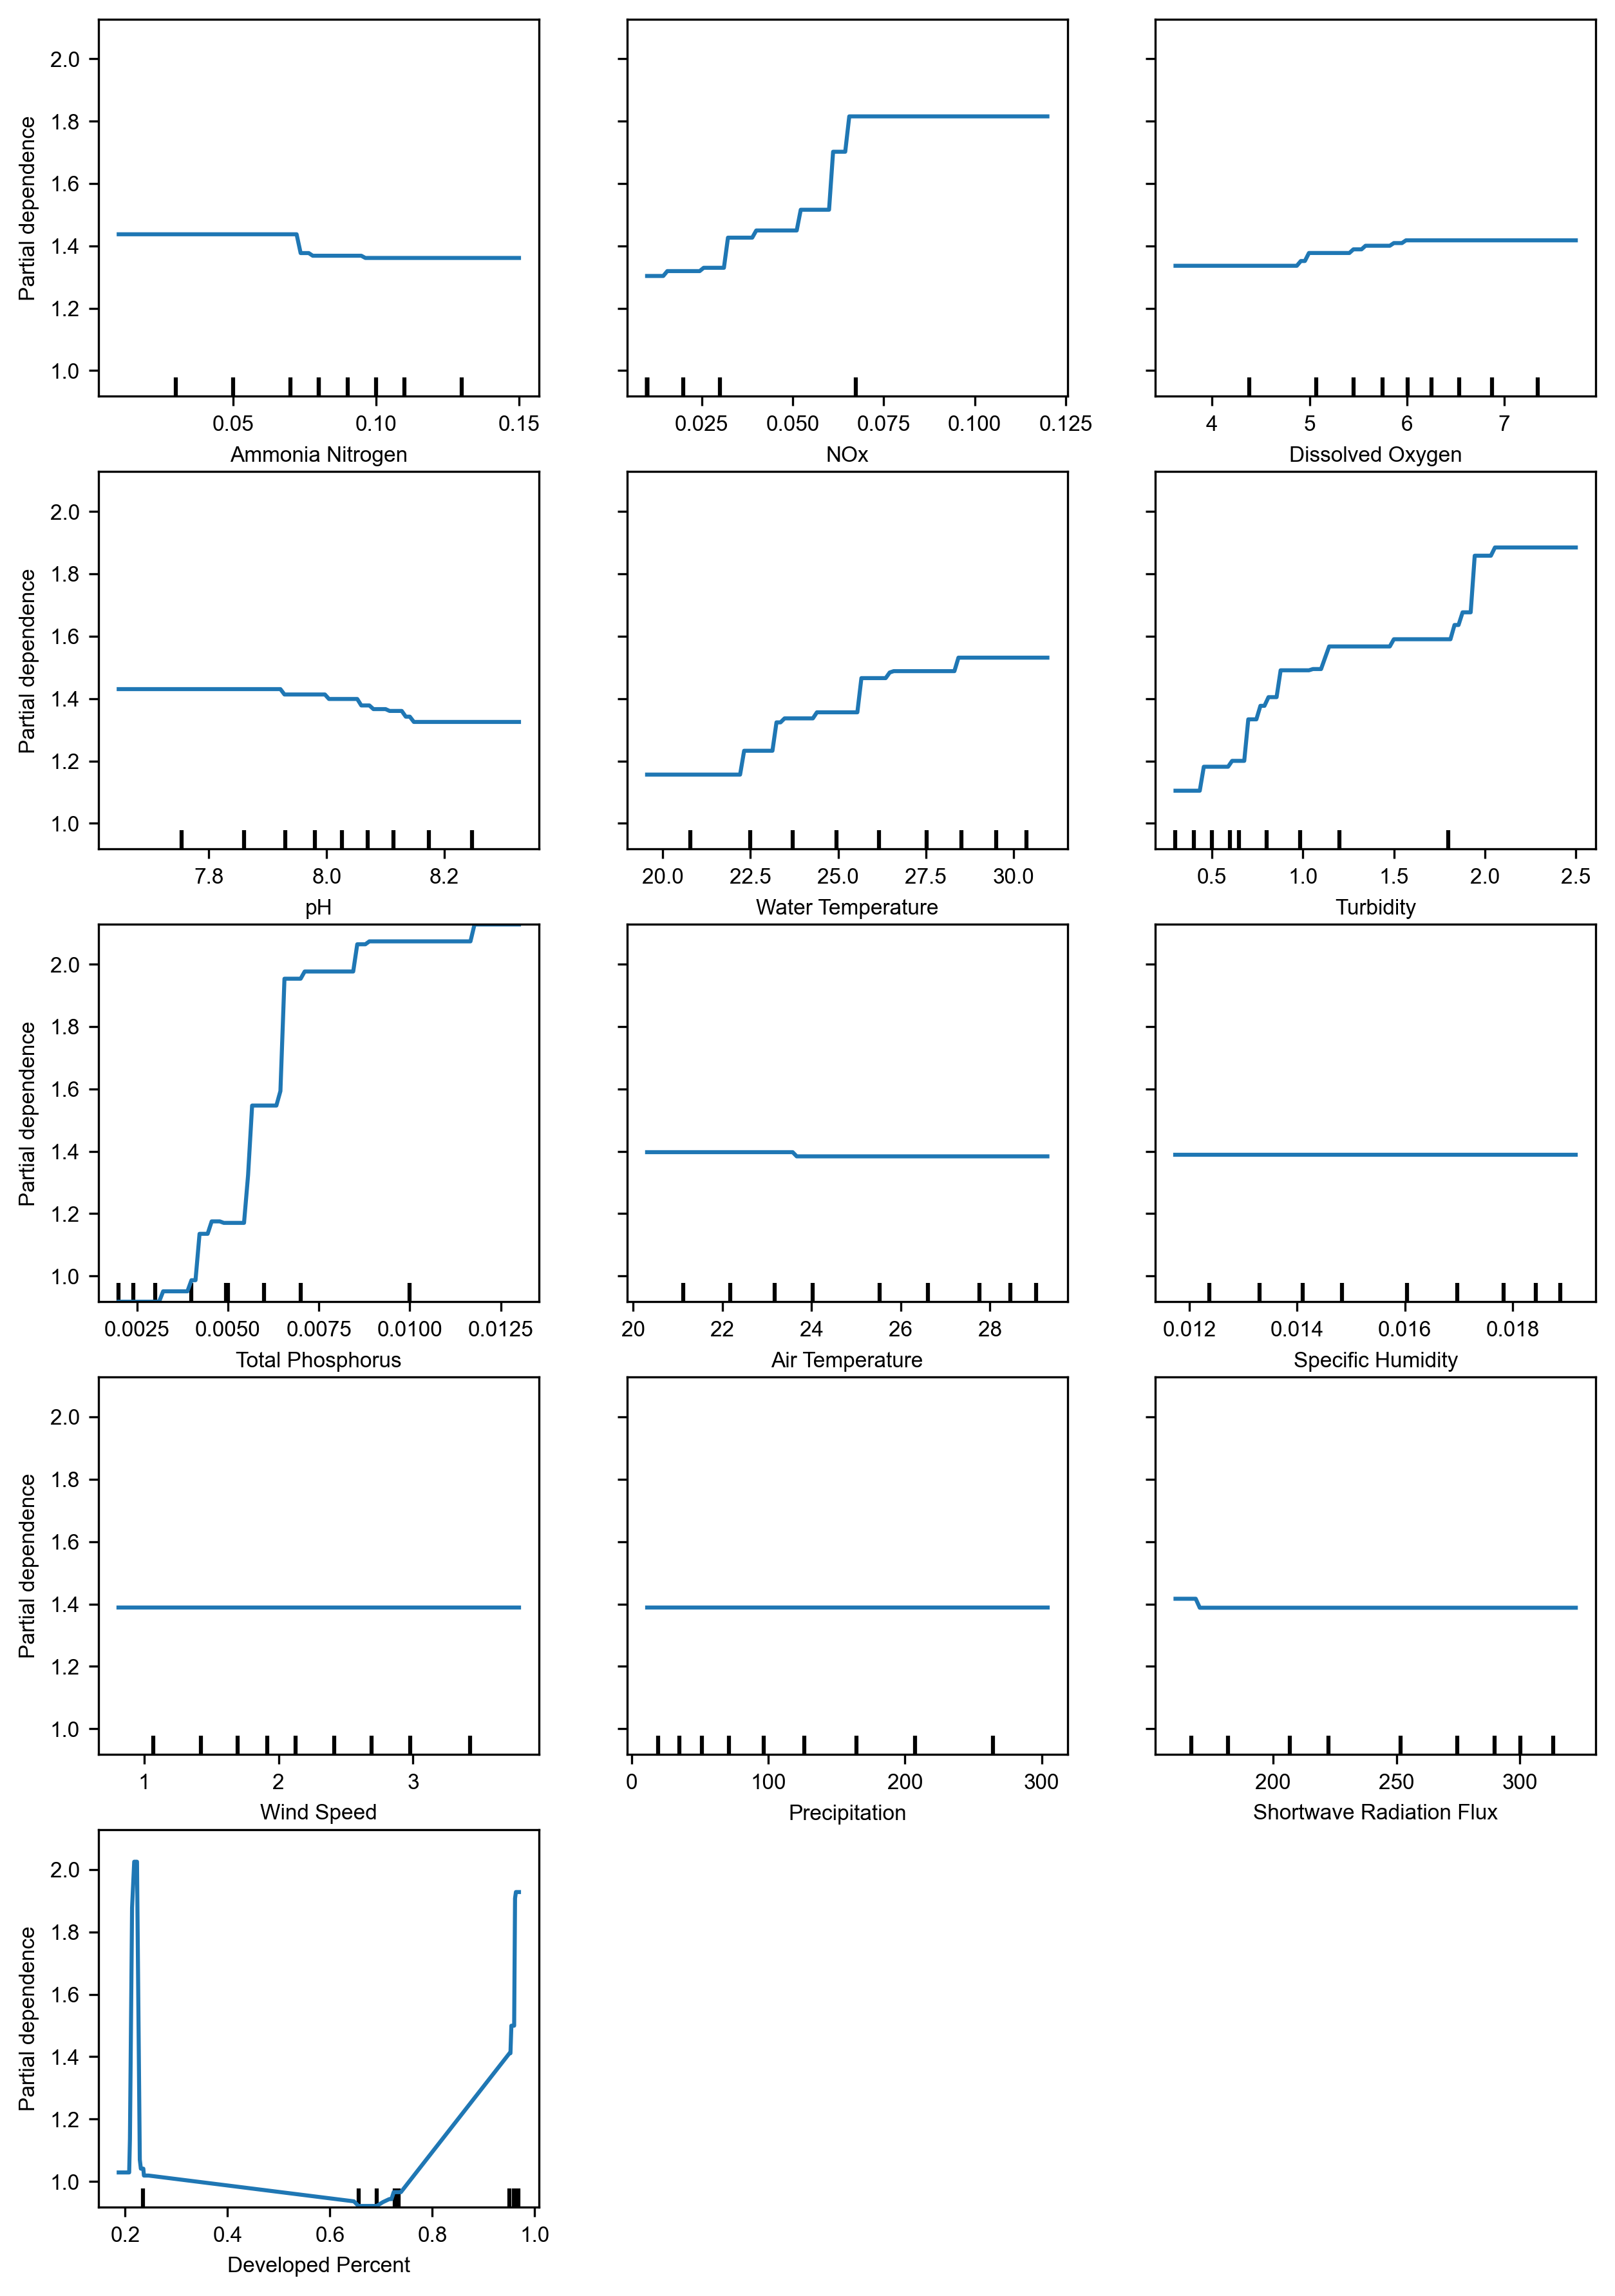

In [49]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':300,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(XGBR, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12])

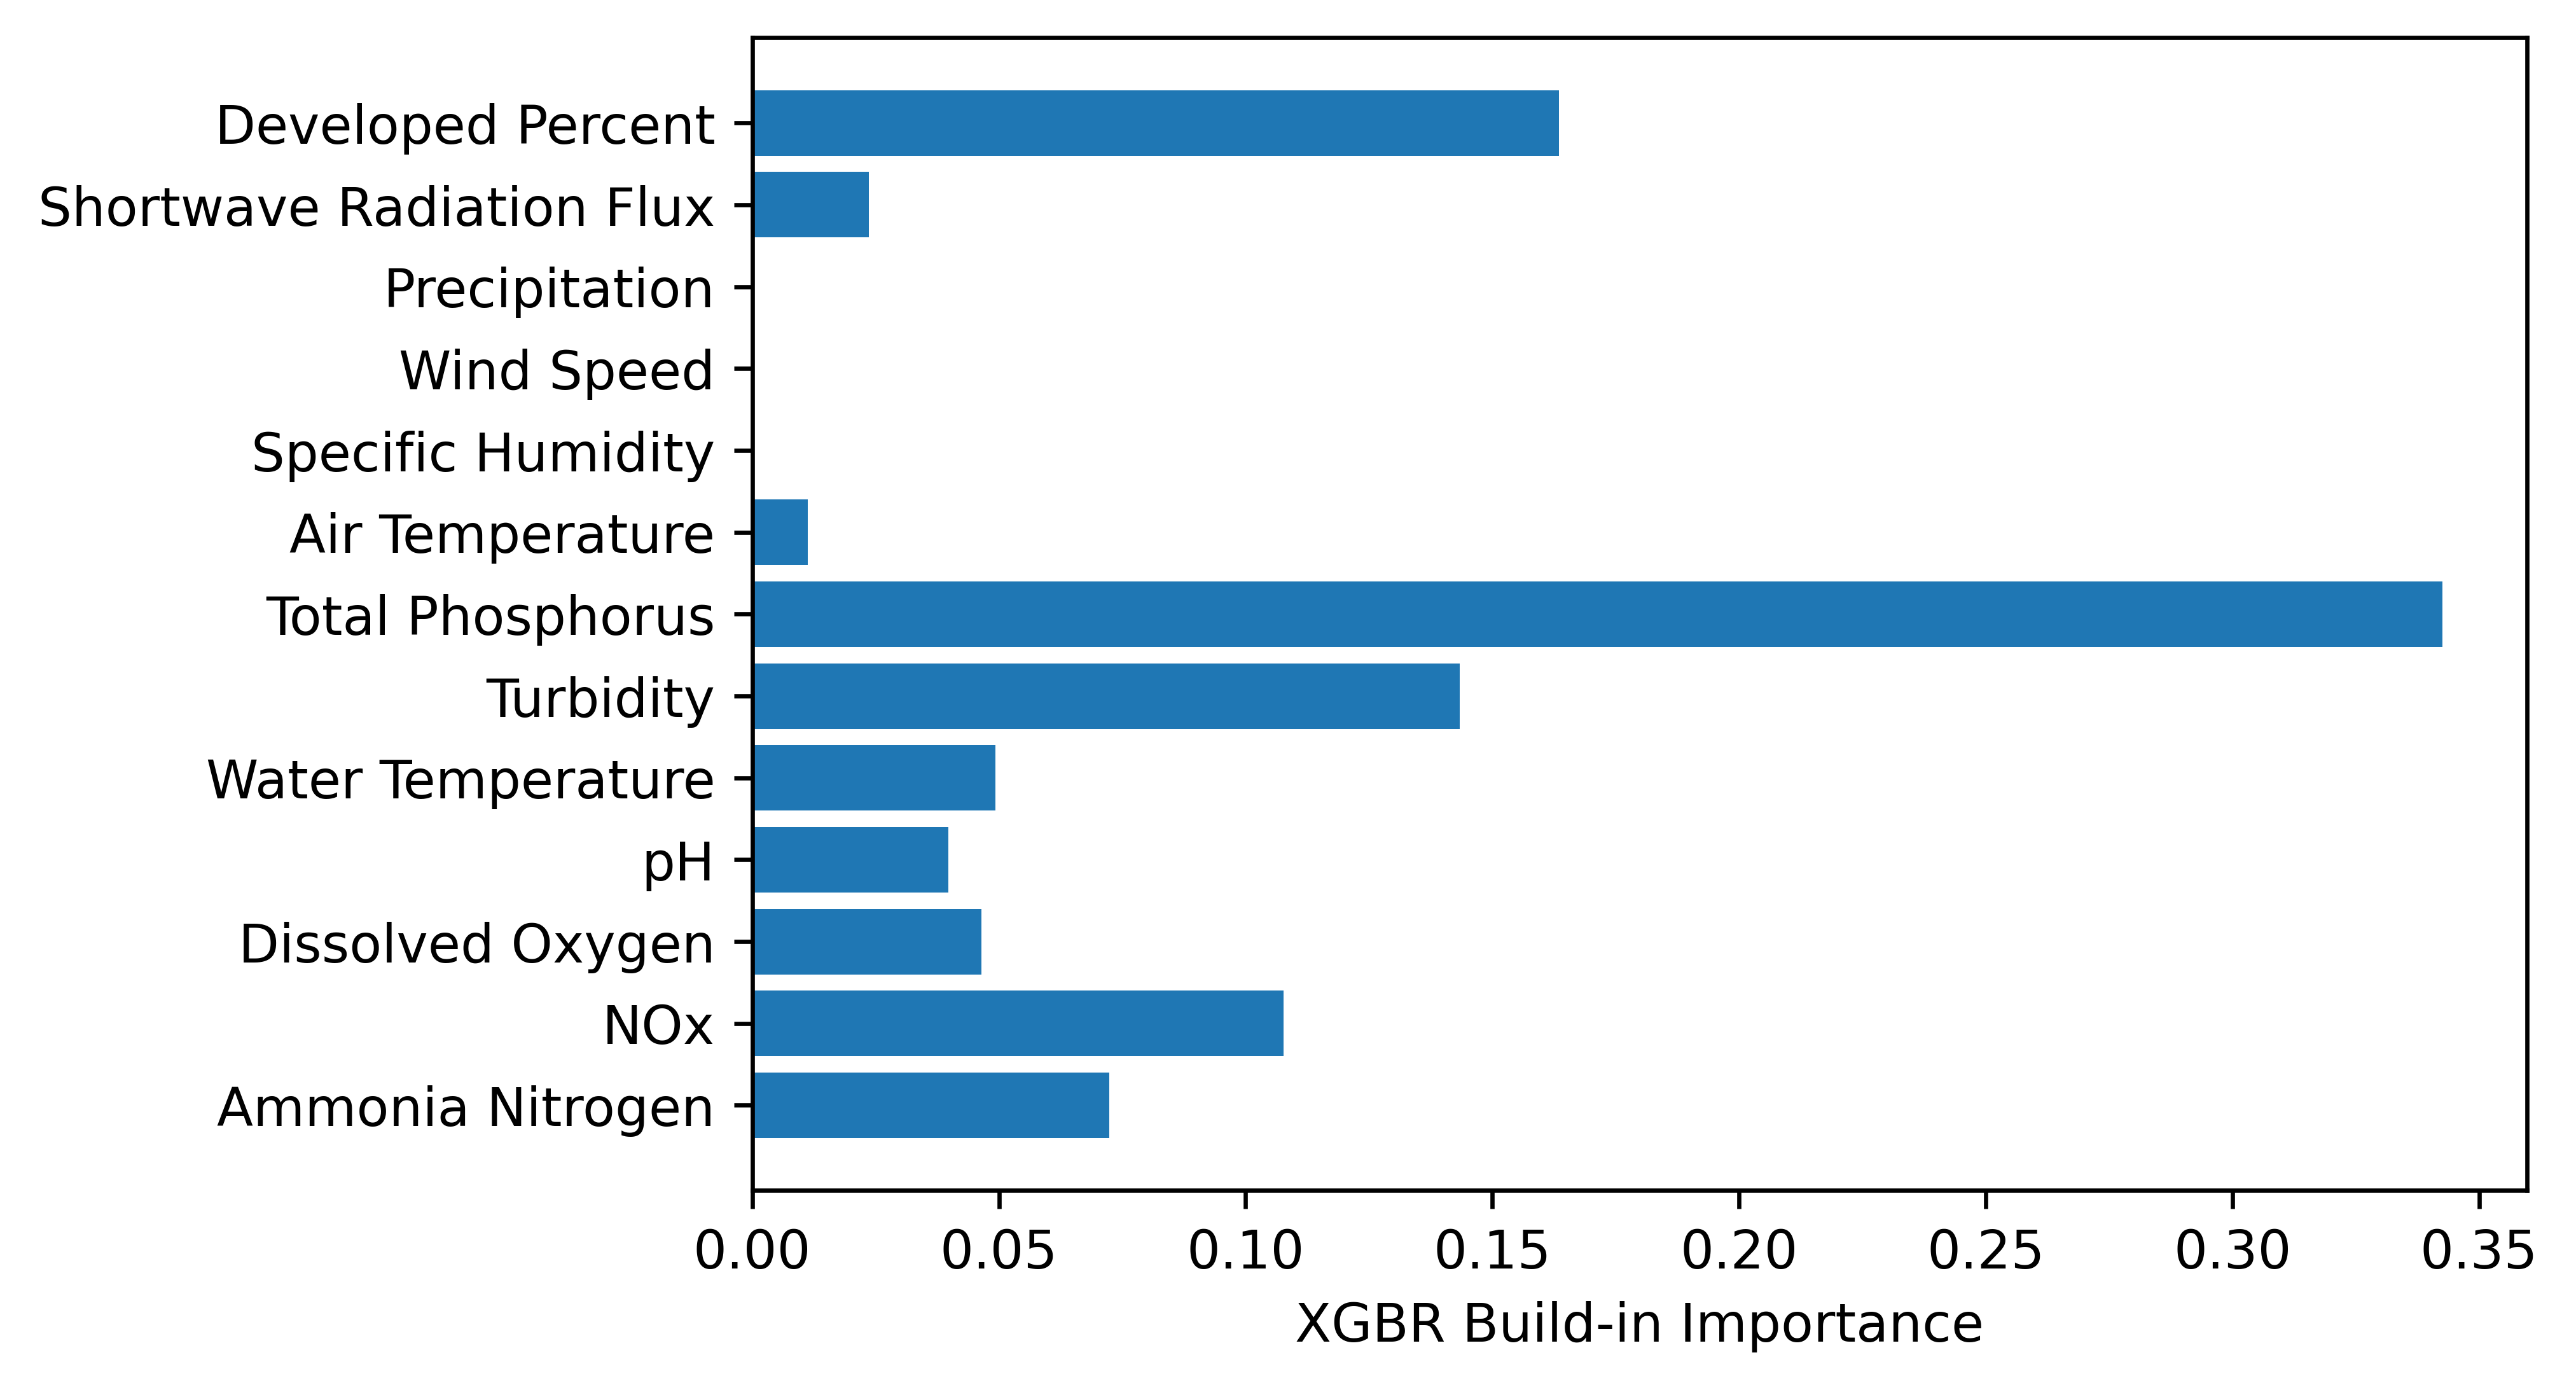

In [44]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
# create dataset
height = XGBR.feature_importances_
bars = (features)
plt.figure(dpi=600)
plt.xlabel('XGBR Build-in Importance')
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
# Show graphic
plt.show()

[1.31312576e-02 8.39574016e-02 6.51926179e-03 1.85944807e-03
 4.26923027e-02 3.08507949e-02 1.90322628e-01 1.81942419e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.49422723e-03
 2.77764546e-01]


Text(0.5, 0, 'XGBR Permutation Importance')

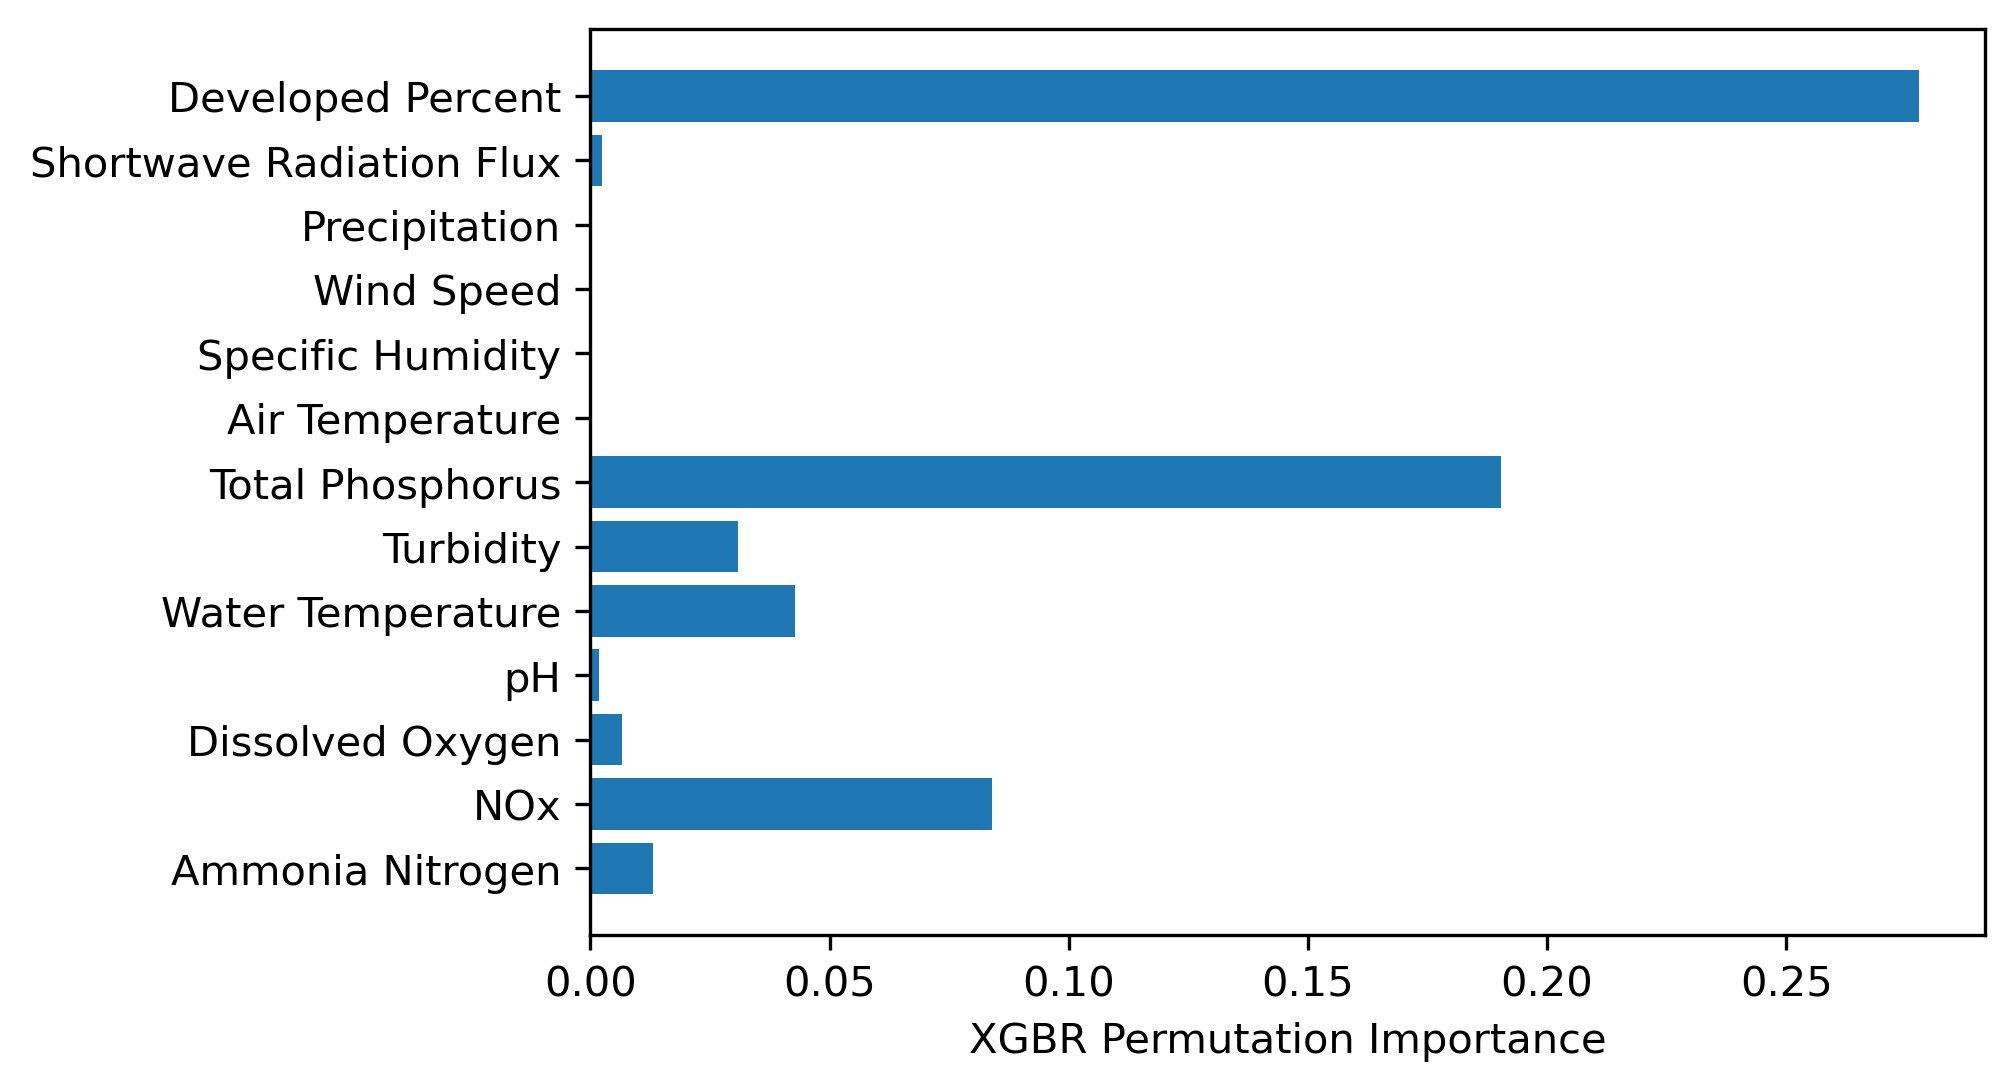

In [45]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(XGBR, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=300)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("XGBR Permutation Importance")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


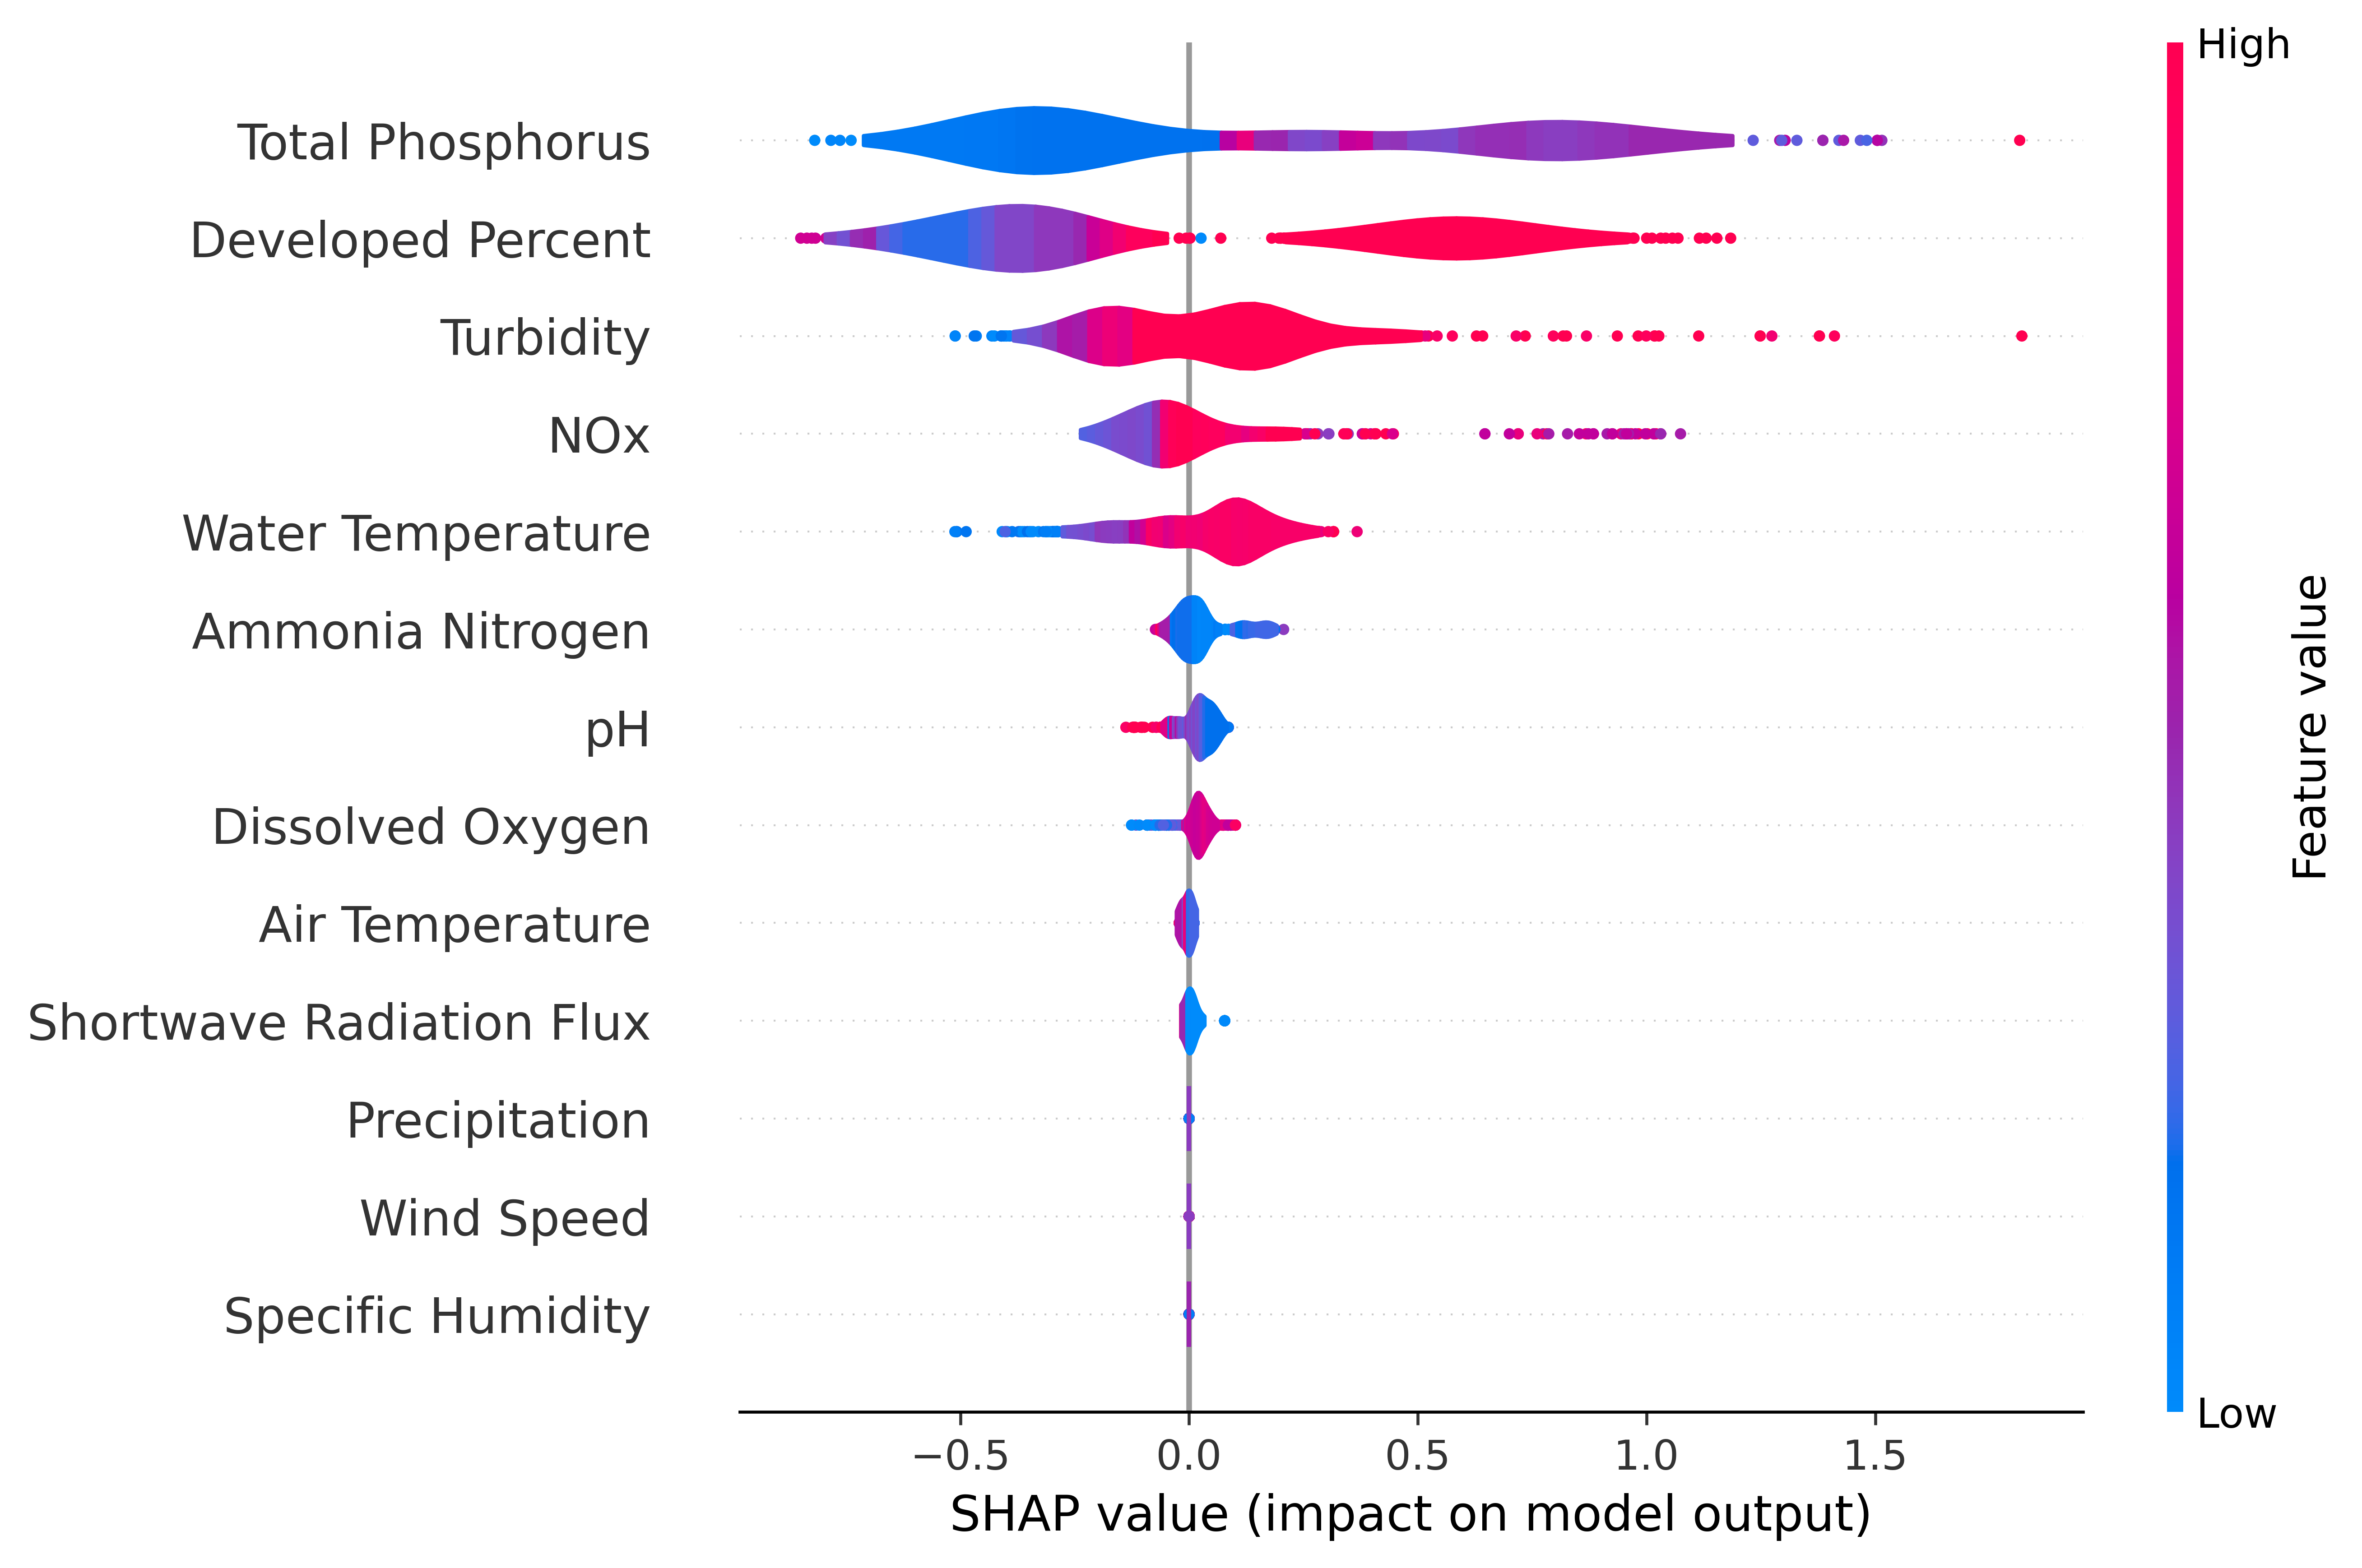

In [46]:
import shap
explainer = shap.TreeExplainer(XGBR)
shap_values = explainer.shap_values(Xtest)
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest, plot_type="violin")

In [51]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([Xtest.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
6,Total Phosphorus,0.509152
12,Developed Percent,0.48231
5,Turbidity,0.204584
1,NOx,0.136829
4,Water Temperature,0.130823
0,Ammonia Nitrogen,0.048549
3,pH,0.035757
2,Dissolved Oxygen,0.034249
7,Air Temperature,0.005849
11,Shortwave Radiation Flux,0.004008


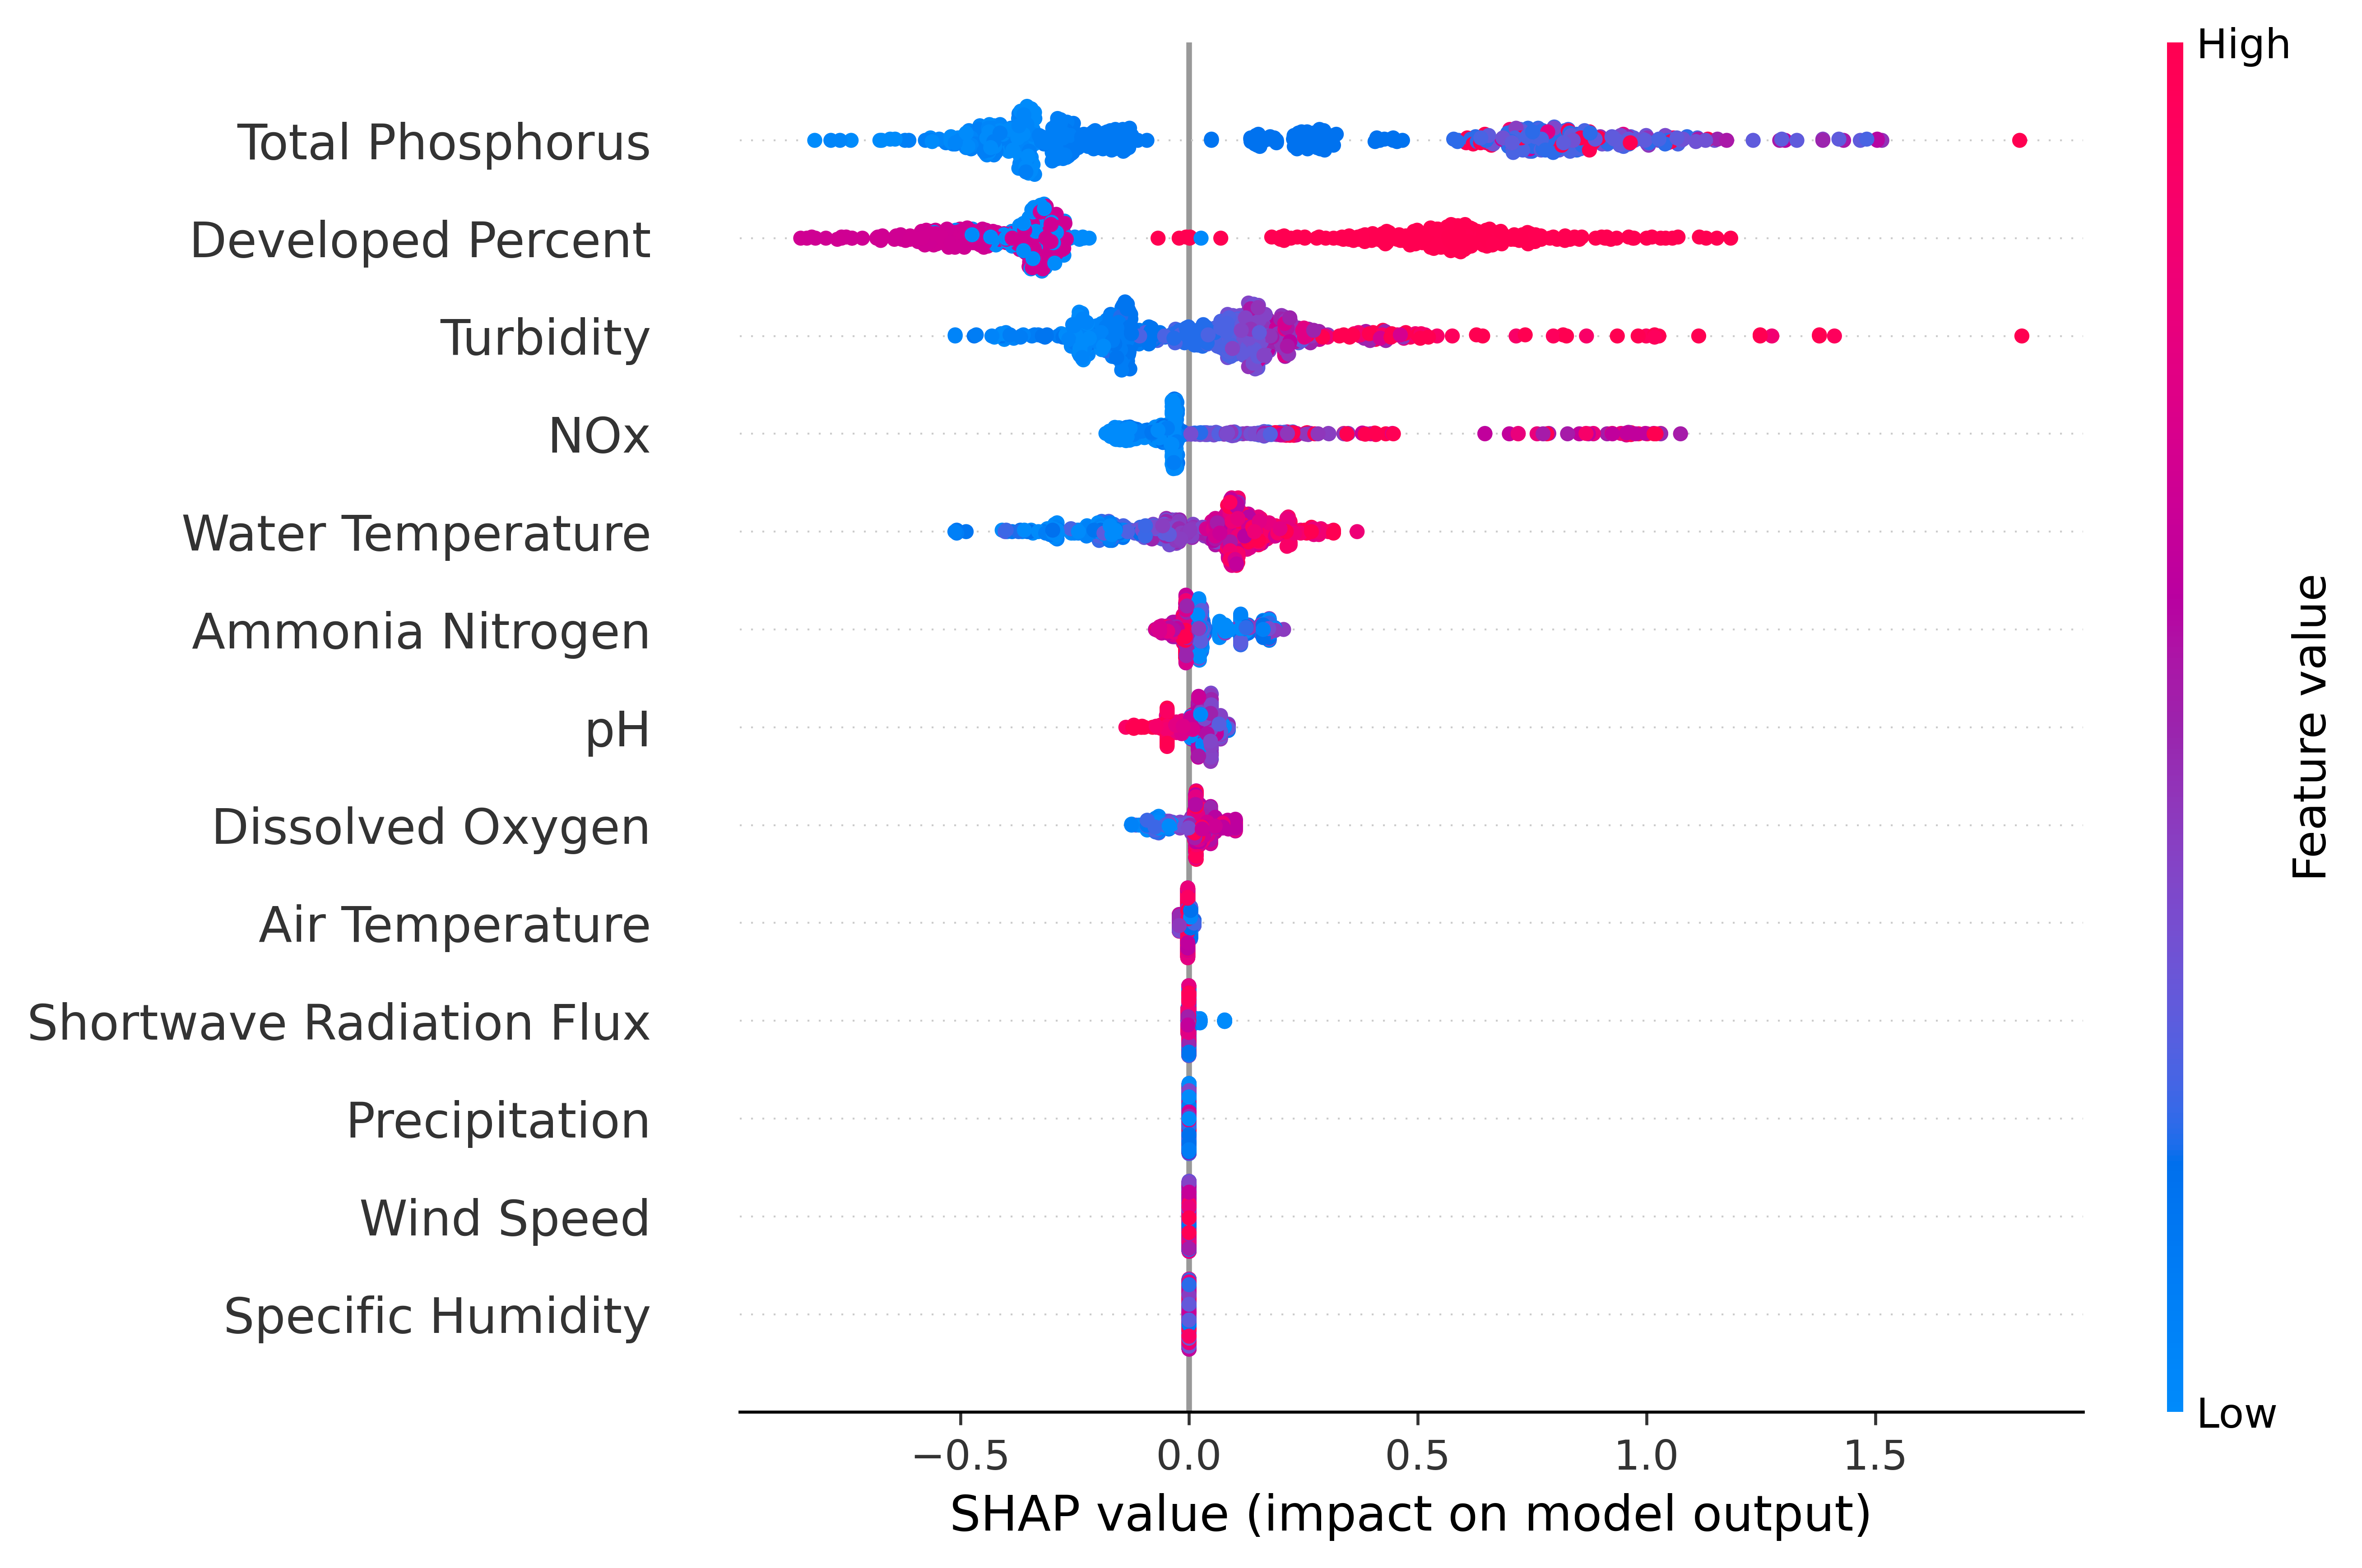

In [48]:
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest)

In [52]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [53]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_current,Predicted Chlorophyll-a
0,2.540000,0.945299
1,3.759632,3.090273
2,2.860000,1.292078
3,3.692863,3.327286
4,5.130000,2.377018
...,...,...
2731,1.400000,0.573001
2732,0.860000,0.763135
2733,0.460000,0.477324
2734,0.540000,0.442049


In [54]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [55]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_current,Predicted Chlorophyll-a
2736,3.080000,4.376369
2737,6.830000,2.835974
2738,4.349878,3.076625
2739,2.740000,2.202924
2740,2.210000,1.636317
...,...,...
3451,0.600000,0.563117
3452,0.480000,0.480791
3453,0.630000,0.607058
3454,0.930000,0.697554


In [56]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_current,Predicted Chlorophyll-a
0,2.540000,0.945299
1,3.759632,3.090273
2,2.860000,1.292078
3,3.692863,3.327286
4,5.130000,2.377018
...,...,...
3451,0.600000,0.563117
3452,0.480000,0.480791
3453,0.630000,0.607058
3454,0.930000,0.697554


In [57]:
All_Y.loc[0]

Chl_current                2.540000
Predicted Chlorophyll-a    0.945299
Name: 0, dtype: float64

In [58]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [59]:
import os
import joblib
joblib.dump(XGBR, "./XGBR_wolag.joblib")

['./XGBR_wolag.joblib']

In [60]:
import os
import joblib
loaded_xgbr = joblib.load("./XGBR_wolag.joblib")

In [61]:
# original
aaaa = loaded_xgbr.predict(x)

In [62]:
aaaa

array([0.9452992, 3.0902731, 1.2920781, ..., 0.6070583, 0.6975541,
       0.668515 ], dtype=float32)

In [63]:
len(aaaa)

3456